In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import cmath
import scipy
from scipy.fftpack import fft, ifft, fftfreq
import scipy.signal
from scipy.integrate import quad

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# Trasformata di Fourier per segnali discreti non periodici  (DTFT)
La trasformata di Fourier per un segnale $x(n)$ è permessa se si verificano queste condizioni:
- Il segnale ha energia finita
- C'è un numero finito di valori estremi
- C'è un numero finito di discontinuità

NB: La trasformata di Fourier per un segnale periodico è consetita.

### Definizione
La trasformata di Fourier per un segnale $x(n)$ non periodico, e con energia finita, è definita nel seguente modo.
$$
X(\omega)=\sum_{n=-\infty}^{\infty} x(n) e^{-j \omega n} = \sum_{n=-\infty}^{\infty} x(n) e^{-j 2 \pi f n}
$$
La quantità $X(\omega)$ rappresenta la scomposizione di $x(n)$ nelle sue componenti di frequenze. Per le proprietà delle onde sinusoidali, sappiamo che esse sono periodiche di periodo $2\pi$. Nel paragrafo Proprietà delle onde sinusoidali (Notebook 01), avevamo infatti visto che  $|\omega|<\pi .$ Questo si riflette anche su $X(\omega)$, che è infatti periodico di periodo $2\pi$. 
$$
\begin{aligned}
X(\omega+2 \pi k) &=\sum_{n=-\infty}^{\infty} x(n) e^{-j(\omega+2 \pi k) n} =\sum_{n=-\infty}^{\infty} x(n) e^{-j \omega n} e^{-j 2 \pi k n} =\sum_{n=-\infty}^{\infty} x(n) e^{-j \omega n}=X(\omega)
\end{aligned}
$$
Perciò la trasformata di Fourier di un segnale non periodico è una funzione periodica della variabile $\omega$. Perciò, la funzione $X(\omega)$ ha un'espansione in serie di Fourier. I coefficienti della serie di Fourier di $X(\omega)$ sono i valori della sequenza $x(n)$. 

È dunque possibile definire le equazioni di sintesi e analisi nel seguente modo (<i> la dimostrazione è a pag. 250 del libro [1]).</i>
    
<i>Equazione di sintesi </i> (trasformata inversa di Fourier):
$$
x(n)=\frac{1}{2 \pi} \int_{2 \pi} X(\omega) e^{j \omega n} d \omega = \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(\omega) e^{j \omega n} d \omega 
$$
<i>Equazione di analisi </i> (trasformata di Fourier):
$$
X(\omega)=\sum_{n=-\infty}^{\infty} x(n) e^{-j \omega n}
$$

L'equazione di sintesi appena scritta, non è altro che un'equazione di analisi della scoposizione in serie di Fourier per segnali periodici continui: dobbiamo dunque considerare $X(\omega)$ come un segnale continuo con periodo $2\pi$. Questo ha una spiegazione logica. Nel caso di segnali $x(n)$ discreti e periodici, la loro ricostruzione poteva avvenire semplicemente conoscendo qual'era il loro periodo $N$ (intero) più piccolo. Li per ricostruire il segnale sommavo in modo pesato tutte le onde sinusoidali complesse che avevano una frequenza espressa come rapporto tra $k = 0, 1, ..., N-1$ e $N$, entrambi numeri interi. E' vero che il segnale $x(n)$ discreto e periodico può assumere qualsiasi frequenza (espressa in cicli per unità di tempo), in un range continuo di valori $-\frac{1}{2} \leq f \leq \frac{1}{2}$, ma ogni frequenza era esprimibile attraverso il rapporto tra numeri interi (la frequenza deve essere razionale nei segnali periodici). Questo faceva si che ogni frequenza era parametrizzabile con numeri interi (in particolare, come rapporto tra interi $k, N$). In altre parole, la risposta in frequenza di un segnale $x(n)$, espressa attraverso i coefficienti $c_k$, era esprimibile con numeri interi. Qui invece la risposta in frequenza è parametrizzabile solo con numeri reali nel range continuo $-\frac{1}{2} \leq f \leq \frac{1}{2} \rightarrow -\pi \leq \omega \leq \pi$. Perciò, il dominio di $X(\omega)$ è $\mathbb{R}$ (mentre il dominio di $c_k$ era $\mathbb{Z}$), e la trasformata inversa di Fourier diventa l'espansione in serie di Fourier per un segnale periodico (di periodo 2$\pi$) continuo.

### Energia, Relazione di Perseval, Energy Density Spectrum per segnali non periodici.
Ricordiamo che la definizione di energia per un segnale $x(n)$ non periodico è definita nel seguente modo.
$$
E_{x}=\sum_{n=-\infty}^{\infty}|x(n)|^{2}
$$
Esprimiamo ora l'energia $E_{x}$ in funzione della risposta in frequenza del segnale $x(n)$, utilizzando cioè l'equazione di sintesi.
$$
E_{x}=\sum_{n=-\infty}^{\infty} x^{*}(n) x(n)=\sum_{n=-\infty}^{\infty} x(n)\left[\frac{1}{2 \pi} \int_{-\pi}^{\pi} X^{*}(\omega) e^{-j \omega n} d \omega\right]
$$
Scambiando l'ordine di sommatoria e integrale, si ottiene:
$$
\begin{aligned}
E_{x} &=\frac{1}{2 \pi} \int_{-\pi}^{\pi} X^{*}(\omega)\left[\sum_{n=-\infty}^{\infty} x(n) e^{-j \omega n}\right] d \omega \\
&=\frac{1}{2 \pi} \int_{-\pi}^{\pi}|X(\omega)|^{2} d \omega
\end{aligned}
$$
Perciò l'energia del segnale $x(n)$ è esprimibile come funzione di $X(\omega)$, nel seguente modo.
$$
E_{x}=\sum_{n=-\infty}^{\infty}|x(n)|^{2}=\frac{1}{2 \pi} \int_{-\pi}^{\pi}|X(\omega)|^{2} d \omega
$$
Quella appena scritta è la <i> relazione di Parseval </i> per un segnale non periodico discreto con energia finita.

Lo spettro $X(\omega)$ è in genere, una funzione complessa. Esso può essere espresso come:
$$
X(\omega)=|X(\omega)| e^{j \Theta(\omega)}
$$
dove
$$
\Theta(\omega)= \measuredangle X(\omega)
$$
è lo spettro di fase, e $|X(\omega)|$ è lo spettro di ampiezza. 

Definiamo ora l'Energy Density Spectrum $S_{xx}(\omega)$ del segnale $x(n)$.
$$
S_{xx}(\omega) = |X(\omega)|^2
$$
Così come la power density spectrum $|c_k|^2$ (definita sui segnali periodici), anche l'Energy Density Spectrum è una sequenza reale, vale a dire che $S_{xx}(\omega)\in \mathbb{R}$. In effetti, anche se la sequenza di coefficienti di Fourier $|X(\omega)|$ fosse composta da unità immaginarie $j$, essendo elevata al quadrato, diventerebbe -1 che è un numero intero. Una conseguenza di ciò, è che l'Energy Density Spectrum non contiene informazioni sulla fase. 

Possiamo notare che nel definire la densità spettrale dei segnali, abbiamo utilizzato il termine Energy Density Spectrum per caratterizzare segnali non periodici con energia finita, e il termine Power Density Spectrum per caratterizzare i segnali periodici. Questa terminologia è in linea con il fatto che i segnali periodici sono segnali potenza, mentre i segnali non periodici con energia finita sono segnali energia. <b> Cercare di capire a fondo quest'utlimo concetto. </b>

### Trasformata di Fourier per segnali non periodici reali
Se $x(n)$ è reale (ovvero se $x^{*}(n)=x(n)),$ allora si può dimostrare che:
$$
X^{*}(\omega)=X(-\omega)
$$
o equivalentemente,
- $|X(-\omega)|=|X(\omega)| \qquad \text{(simmetria pari)}$
- $\measuredangle X(-\omega)=- \measuredangle X(\omega), \quad \text { (simmetria dispari) }$

Da queste relazioni otteniamo che:
$$
S_{x x}(-\omega)=S_{x x}(\omega) \qquad \text{(simmetria pari)}
$$

Grazie alle proprietà di simmetria, possiamo concludere che per determinare tutta la risposta in frequenza del segnale $x(n)\in \mathbb{R}$, non dobbiamo cercare nel range  $-\frac{1}{2} \leq f \leq \frac{1}{2} \rightarrow -\pi \leq \omega \leq \pi$, ma possiamo limitarci al range $0 \leq f \leq \frac{1}{2} \rightarrow 0 \leq \omega \leq \pi$. In altre parole, se conosciamo $X(-\omega)$ nel range $0 \leq \omega \leq \pi$, ci è possibile calcolare anche $X(-\omega)$ nel range $-\pi \leq \omega < 0$. Riassumendo, l'intera descrizione nel dominio delle frequenze del segnale non periodico $x(n)\in \mathbb{R}$ è determinata dallo spettro $X(-\omega)$ nell'insieme continuo di valori $0 \leq \omega \leq \pi$.

#### Esempio 1 
Determinare la trasformata di Fourier e l'Energy Density Spectrum $S_{xx}(\omega)$ del segnale $x(n)$.
$$
x(n)=a^{n} u(n), \quad-1<a<1
$$
Dove $u(n)$ è lo unit step signal (vedi notebook 01), ovvero un segnale che assume 1 se $n\geq0$, e 0 altrimenti. 

La trasformata di Fourier per il segnale $x(n)$ è la seguente
$$
X(\omega)=\sum_{n=0}^{\infty} a^{n} e^{-j \omega n}=\sum_{n=0}^{\infty}\left(a e^{-j \omega}\right)^{n}
$$
A questo punto, l'ideale sarebbe applicare la formula per il calcolo di una serie geometrica convergente. Data una serie geometrica $\sum_{n=0}^{\infty}q^n$, se $|q|<1$, allora:
$$
\sum_{n=0}^{\infty}q^n = \frac{1}{1-q}
$$
Nel nostro caso dobbiamo dunque capire se $|a e^{-j \omega}| < 1$. Sappiamo che questo si verifica perchè $|e^{-j \omega}| < 1 \quad \forall \omega$, e  $|a| < 1$ per definizione del segnale $x(n)$. Perciò, possiamo riscrivere la trasformata di Fourier nel seguente modo.
$$
X(\omega)=\frac{1}{1-a e^{-j \omega}}
$$
A questo punto possiamo calcolare l'energy density spectrum
$$
S_{xx}(\omega) = |X(\omega)|^2=X(\omega) X(\omega)=\frac{1}{\left(1-a e^{-j \omega}\right)\left(1-a e^{-j \omega}\right)} = \frac{1}{1-2 a \cos \omega+a^{2}}
$$

Andiamo ora a vedere in Python questo esempio. Consideriamo $\omega = 2 \pi f$, con $f = 0.3$ cicli/unità di tempo.
Andiamoa vedere come cambiano la trasformata di Fourier e l'Energy Density Spectrum al variare del coefficiente $a$.
##### a = 0.5

In [2]:
def fn(n, a):
    assert abs(a) <= 1
    if n>=0:
        out = a**n
    else:
        out = 0
    return out
def calc_x_n(n, a):
    return [fn(i, a) for i in n] #np.array([fn(i, a) for i in n]) #np.vectorize(fn)(n, a)

No handles with labels found to put in legend.


Frequenza = 0.33 cicli/unità_tempo = 16.67 Hz


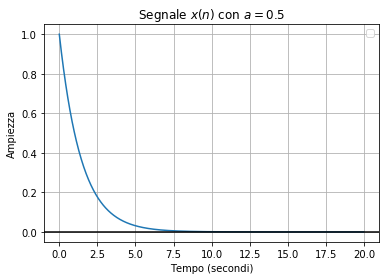

In [7]:
fs = 50
n = np.arange(0.0, 20, 1/fs)
f = 1/3
f_hz = f/n[1]
print('Frequenza = {} cicli/unità_tempo = {} Hz'.format(np.round(f, 2), np.round(f_hz, 2)))
a = 0.5
x_n = calc_x_n(n, a)
plt.plot(n, x_n)
plt.title('Segnale $x(n)$ con $a = {}$'.format(a))
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

In [8]:
def fourier_transform(w, a):
    return 1/(1 - a*(np.cos(w) - 1j*np.sin(w)))
def calc_fourier_transform(w,a):
    return np.vectorize(fourier_transform)(w, a)
def energy_dens_spec(w, a):
    return 1/(1 - 2*a*np.cos(w) + a**2)
def calc_energy_dens_spec(w,a):    
    return np.vectorize(energy_dens_spec)(w,a)

In [9]:
def plot_ft_and_eds(rad_s = True):
    ### xlabel = 'rad_s': unità di misura sono i radianti al secondo (la frequenza sono gli Hertz).
    ### altrimenti l'unità di misura sono i radianti per unità di tempo. 
    ws_rad_unit_tempo = np.linspace(-np.pi, np.pi, len(x_n))
    ft_ = calc_fourier_transform(ws_rad_unit_tempo, a)
    eds_ = calc_energy_dens_spec(ws_rad_unit_tempo, a)
    if rad_s:
        ws = ws_rad_unit_tempo/n[1]
        ft = ft_/n[1]
        eds = eds_/n[1]
        xlabel = 'Pulsazioni in radianti al secondo'
        lim_inf = -np.pi/n[1]
        lim_sup = np.pi/n[1]
    else:
        ws = np.linspace(-np.pi, np.pi, len(x_n))
        ft = ft_
        eds = eds_
        xlabel = 'Pulsazioni in radianti per unità di tempo'
        lim_inf = -np.pi
        lim_sup = np.pi
        
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].plot(ws, ft.real)
    axs[0, 0].axvline(x=lim_inf, color='r', ls='--')
    axs[0, 0].axvline(x=lim_sup, color='r', ls='--')
    axs[0, 0].set_title('Trasformata di Fourier (parte reale)')
    axs[0, 0].set_xlabel(xlabel)
    axs[0, 0].set_ylabel('R{$X(\omega)$}')
    axs[0, 0].grid(True, which='both')
    axs[0, 0].axhline(y=0, color='k')

    axs[0, 1].plot(ws, ft.imag)
    axs[0, 1].axvline(x=lim_inf, color='r', ls='--')
    axs[0, 1].axvline(x=lim_sup, color='r', ls='--')
    axs[0, 1].set_title('Trasformata di Fourier (parte immaginaria)')
    axs[0, 1].set_xlabel(xlabel)
    axs[0, 1].set_ylabel('I{$X(\omega)$}')
    axs[0, 1].grid(True, which='both')
    axs[0, 1].axhline(y=0, color='k')

    axs[1, 0].plot(ws, [abs(i) for i in ft])
    axs[1, 0].axvline(x=lim_inf, color='r', ls='--')
    axs[1, 0].axvline(x=lim_sup, color='r', ls='--')
    axs[1, 0].set_title('Spettro di ampiezza')
    axs[1, 0].set_xlabel(xlabel)
    axs[1, 0].set_ylabel('|$X(\omega)$|')
    axs[1, 0].grid(True, which='both')
    axs[1, 0].axhline(y=0, color='k')

    axs[1, 1].plot(ws, [cmath.phase(i) for i in ft])
    axs[1, 1].axvline(x=lim_inf, color='r', ls='--')
    axs[1, 1].axvline(x=lim_sup, color='r', ls='--')
    axs[1, 1].set_title('Spettro di fase')
    axs[1, 1].set_xlabel(xlabel)
    axs[1, 1].set_ylabel('$\measuredangle X(\omega)$')
    axs[1, 1].grid(True, which='both')
    axs[1, 1].axhline(y=0, color='k')
    plt.show()

    plt.plot(ws, eds)
    plt.axvline(x=lim_inf, color='r', ls='--')
    plt.axvline(x=lim_sup, color='r', ls='--')
    plt.title('Energy Density Spectrum')
    plt.xlabel(xlabel)
    plt.ylabel('$S_{xx}(\omega)$')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()

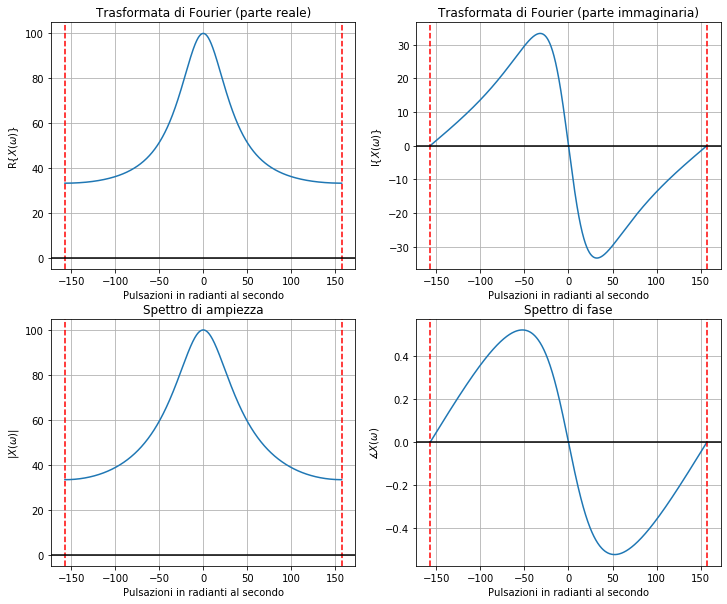

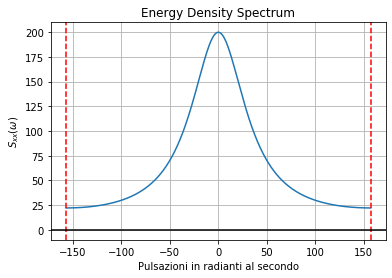

In [10]:
plot_ft_and_eds(rad_s = True)

Vediamo ora come cambiano i risultati per 
##### a = -0.5
Nel plot non utilizzo 'l', ma 'o' perchè tutti i numeri complessi del tipo $(-\frac{1}{2})^{0.02} = 0.98 + 0.06j$ me li converte direttamente a nan, non so perchè.

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


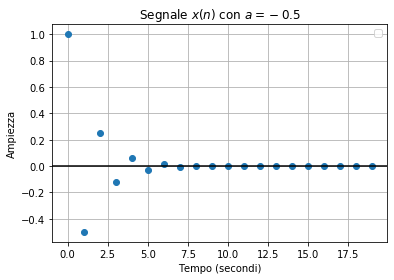

In [11]:
a = -0.5
x_n = calc_x_n(n, a)
plt.plot(n, x_n, 'o')
plt.title('Segnale $x(n)$ con $a = {}$'.format(a))
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

Questa volta anzichè utilizzare i radianti al secondo sull'asse delle x (che è la pulsazione corrispondente alla frequenza espressa in Hz), utilizziamo i radianti per unità di tempo.

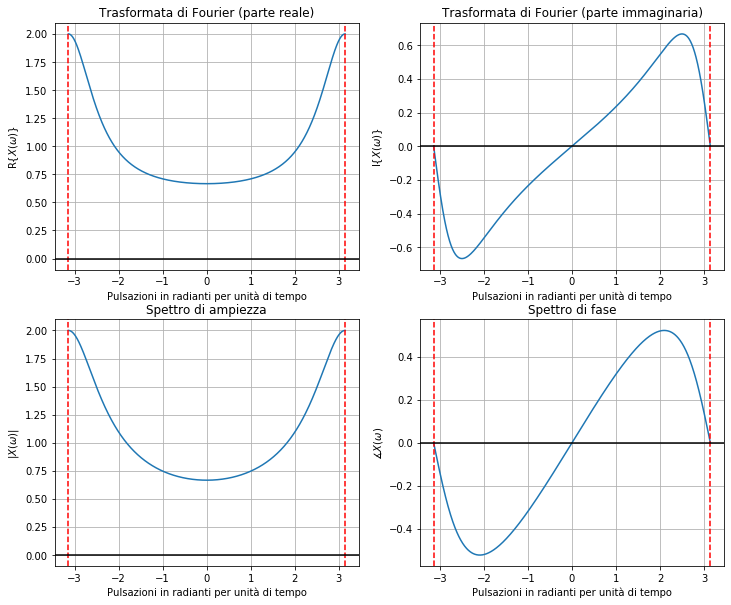

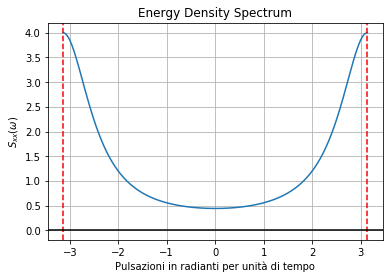

In [12]:
plot_ft_and_eds(rad_s = False)

Andiamo ora a ricostruire il sengale, con l'equazione di sintesi

$$
x(n)=\frac{1}{2 \pi} \int_{2 \pi} X(\omega) e^{j \omega n} d \omega = \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(\omega) e^{j \omega n} d \omega 
$$

In [13]:
def integrand(w, n, a):
    return fourier_transform(w, a)*(np.cos(w*n) + 1j*np.sin(w*n))
def eq_sintesi(n, a):
    return 1/(2*np.pi)*quad(integrand, -np.pi, np.pi, args=(n, a))[0]
eq_sintesi_vec = np.vectorize(eq_sintesi)

### Come mai per a = 0.5 ho questa differenza rispetto al segnale originale?

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


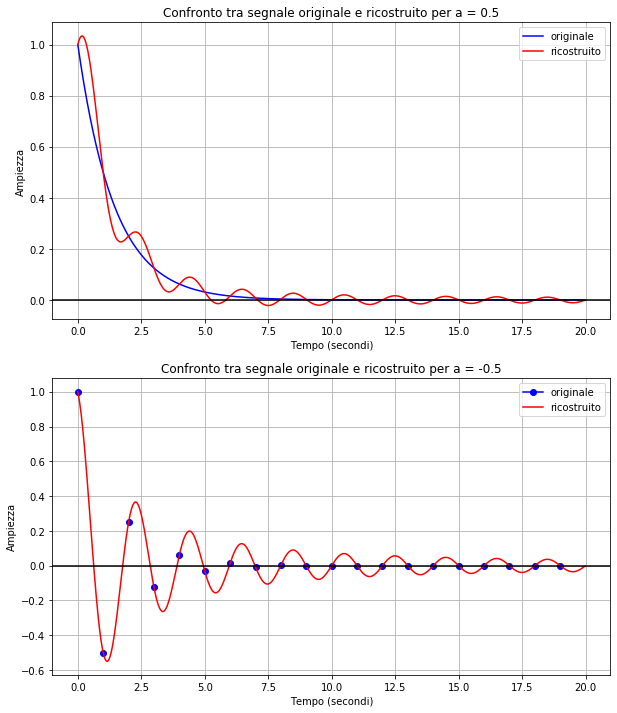

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
x_n_reconstructed = eq_sintesi_vec(n, 0.5)
x_n = calc_x_n(n, 0.5)
axs[0].plot(n, x_n, 'b', label = 'originale')
axs[0].plot(n, x_n_reconstructed, 'r', label = 'ricostruito')

axs[0].set_title('Confronto tra segnale originale e ricostruito per a = 0.5'.format(a))
axs[0].set_xlabel('Tempo (secondi)')
axs[0].set_ylabel('Ampiezza')
axs[0].grid(True, which='both')
axs[0].axhline(y=0, color='k')
axs[0].legend(loc='upper right')

x_n_reconstructed = eq_sintesi_vec(n, -0.5)
x_n = calc_x_n(n, -0.5)
axs[1].plot(n, x_n, 'b', label = 'originale', marker = 'o')
axs[1].plot(n, x_n_reconstructed, 'r', label = 'ricostruito')
axs[1].set_title('Confronto tra segnale originale e ricostruito per a = -0.5'.format(a))
axs[1].set_xlabel('Tempo (secondi)')
axs[1].set_ylabel('Ampiezza')
axs[1].grid(True, which='both')
axs[1].axhline(y=0, color='k')
axs[1].legend(loc='upper right')

### Relazione tra Trasformata di Fourier e Trasformata-z
Abbiamo detto che la trasformata $z$ di un segnale discreto $x(n)$ è definita dalla serie di potenza $X(z)$.
$$
X(z) = \sum_{n=-\infty}^{\infty} x(n) z^{-n} = \sum_{n=-\infty}^{\infty} x(n) r^{-n}e^{-j\omega n}, \qquad \mathrm{ROC}: r_2 < |z|< r_1
$$
con $r = |z|$ e $\omega = \measuredangle z$. Scritta in questo modo risulta chiaro che $X(z)$ può essere vista come la trasformata di Fourier del segnale $x(n)r^{-n}$. Notiamo che, se |z| = 1, allora:
$$
X(z) = X(\omega) = \sum_{n=-\infty}^{\infty} x(n) e^{-j\omega n}
$$
Perciò, la trasformata di Fourier può essere vista come la trasformata-z della sequenza valutata sulla circonferenza di raggio unitaio (quella definita sull'asse reale e immaginario). 
NB: L'esistenza della trasformta-z implica che esista la trasformata di Fourier in alcune regioni del piano-z. Tuttavia, l'esistenza della trasformata di Fourier non implica l'esistenza della trasformata-z. <i> Per approfondire, vedi pag.259 libro [1] </i>
### Il Ceptrum
Consideriamo un segnale $x(n)$ e la sua trasformata-$z$ $X(z)$. Il cepstrum (complesso) di $x(n)$ è definito come la sequnza $c_x(n)$, che è a sua volta l'inversa della trasformata-$z$ di $C_x(z)$. Andiamo per gradi, e definiamo intanto la quantità $C_x(z)$.
$$
C_{x}(z)=\ln X(z)
$$
Se valgono le seguenti condizioni:
$$
\qquad \mathrm{ROC}: r_2 < |z|< r_1 \quad \text{con} \quad 0 < r_1 < 1, r_2 > 1
$$
allora $C_{x}(z)$ può essere visto come:
$$
C_{x}(z)=\ln X(z)=\sum_{n=-\infty}^{\infty} c_{x}(n) z^{-n}
$$
dove $c_{x}(n)$ è pari a:
$$
c_{x}(n)=\frac{1}{2 \pi j} \int_{C} \ln X(z) z^{n-1} d z
$$
Ovviamente se poniamo il caso specifico di |z| = 1, allora possiamo scrivere:
$$
C_{x}(\omega)=\ln X(\omega)=\sum_{n=-\infty}^{\infty} c_{x}(n) e^{-j \omega n}
$$
dove $c_{x}(n)$ è pari a:
$$
c_{x}(n)=\frac{1}{2 \pi} \int_{-\pi}^{\pi} \ln X(\omega) e^{j \omega n} d \omega
$$
Ora, se scomponiamo $X(\omega)$ in termini di magnitudine e fase, ovvero scrivendo $
X(\omega)=|X(\omega)| e^{j \theta(\omega)}$, allora $\ln X(\omega)=\ln |X(\omega)|+j \theta(\omega)$. Possiamo dunque riscrivere il ceptrum complesso nel seguente modo:
$$
c_{x}(n)=\frac{1}{2 \pi} \int_{-\pi}^{\pi}[\ln |X(\omega)|+j \theta(\omega)] e^{j \omega n} d \omega
$$
A questo punto possiamo scomporre due quantità.
$$
\begin{aligned}
c_{m}(n) &=\frac{1}{2 \pi} \int_{-\pi}^{\pi} \ln |X(\omega)| e^{j \omega n} d \omega \\
c_{\theta}(n) &=\frac{1}{2 \pi} \int_{-\pi}^{\pi} \theta(\omega) e^{j \omega n} d \omega
\end{aligned}
$$
In molte applicazioni, come lo speech signal processing, viene calcolata solo la componente $c_{m}(n)$, ignorando la fase di $X(\omega)$. Il ceptrum è molto utilizzato nel signal processing, specialmente nelle operazioni di deconvoluzione e deconvoluzione armonica (<i> a partire da pag. 358 del libro [1] </i>). 

# Proprietà e teoremi della Trasformata di Fourier

### Simmetria
Dato un segnale $x(n)$ e la sua trasformata $X(\omega)$, possiamo scomporli in parte immaginaria e reale.
$$
\begin{aligned}
x(n) &=x_{R}(n)+j x_{I}(n) \\
X(\omega) &=X_{R}(\omega)+j X_{I}(\omega)
\end{aligned}
$$
Applicando la seguente relazione: $e^{j \omega}=\cos \omega + j \sin \omega$, possiamo riscrivere le singole componenti immaginarie e reali nel seguente modo.
$$
\begin{aligned}
x_{R}(n) &=\frac{1}{2 \pi} \int_{2 \pi}\left[X_{R}(\omega) \cos \omega n-X_{I}(\omega) \sin \omega n\right] d \omega \\
x_{I}(n) &=\frac{1}{2 \pi} \int_{2 \pi}\left[X_{R}(\omega) \sin \omega n+X_{I}(\omega) \cos \omega n\right] d \omega
\end{aligned}
$$


$$
\begin{array}{l}
X_{R}(\omega)=\sum_{n=-\infty}^{\infty}\left[x_{R}(n) \cos \omega n+x_{I}(n) \sin \omega n\right] \\
X_{I}(\omega)=-\sum_{n=-\infty}^{\infty}\left[x_{R}(n) \sin \omega n-x_{I}(n) \cos \omega n\right]
\end{array}
$$
A questo punto, investighiamo alcuni casi particolari. 
#### Simmetria per segnali reali
Se un segnale $x(n)$ è reale, allora $x_{R}(n) = x(n)$ e $x_{I}(n) = 0$. Questo fa si che
$$
X_{R}(\omega)=\sum_{n=-\infty}^{\infty} x(n) \cos \omega n \\
X_{I}(\omega)=-\sum_{n=-\infty}^{\infty} x(n) \sin \omega n
$$
visto che $\cos (-\omega n)=\cos \omega n$ e $\sin (-\omega n)=-\sin \omega n,$ allora possiamo scrivere:
$$
\begin{aligned}
X_{R}(-\omega) &=X_{R}(\omega), & &(\text { simmetria pari}) \\
X_{I}(-\omega) &=-X_{I}(\omega), & &(\text { simmetria dispari})
\end{aligned}
$$
Che equivale a dire:
$$
X^{*}(\omega)=X(-\omega)
$$
Possiamo a questo punto ricavare spettro di fase e di ampiezza. 
$$
\begin{array}{l}
|X(\omega)|=\sqrt{X_{R}^{2}(\omega)+X_{I}^{2}(\omega)} \\
\measuredangle X|\omega|=\tan ^{-1} \frac{X_{I}(\omega)}{X_{R}(\omega)}
\end{array}
$$
Come conseguenza, anche lo spettro e di fase e ampiezza sono simmetrici.
- $|X(-\omega)|=|X(\omega)| \qquad \text{(simmetria pari)}$
- $\measuredangle X(-\omega)=- \measuredangle X(\omega), \quad \text { (simmetria dispari) }$

Inoltre, visto che $x_{R}(n) = x(n)$, allora 
$$
x(n) = x_{R}(n) =\frac{1}{2 \pi} \int_{2 \pi}\left[X_{R}(\omega) \cos \omega n-X_{I}(\omega) \sin \omega n\right] d \omega
$$
E visto che $x_{R}(n)\cos \omega n$ e $x_{I}(n)\sin \omega n$ sono funzioni pari di $\omega$, allora:
$$
x(n) =\frac{1}{\pi} \int_{0}^{\pi}\left[X_{R}(\omega) \cos \omega n-X_{I}(\omega) \sin \omega n\right] d \omega
$$
#### Simmetria per segnali reali e pari
Se $x(n)$ è reale e pari (ovvero $x(-n)=x(n)$), allora:
$$
x(n) =\frac{1}{\pi} \int_{0}^{\pi} X_{R}(\omega) \cos \omega n d \omega
$$
<i> Dimostrazione a pag. 274 del libro [1] </i>

#### Simmetria per segnali reali e dispari
Se $x(n)$ è reale e dispari (ovvero $x(-n)=-x(n)$), allora:
$$
x(n) =-\frac{1}{\pi} \int_{0}^{\pi} X_{I}(\omega) \sin \omega n d \omega
$$
<i> Dimostrazione a pag. 274 del libro [1] </i>

### Simmetria
Dato un segnale $x(n)$ e la sua trasformata $X(\omega)$, possiamo scomporli in parte immaginaria e reale.
$$
\begin{aligned}
x(n) &=x_{R}(n)+j x_{I}(n) \\
X(\omega) &=X_{R}(\omega)+j X_{I}(\omega)
\end{aligned}
$$
Applicando la seguente relazione: $e^{j \omega}=\cos \omega + j \sin \omega$, possiamo riscrivere le singole componenti immaginarie e reali nel seguente modo.
$$
\begin{aligned}
x_{R}(n) &=\frac{1}{2 \pi} \int_{2 \pi}\left[X_{R}(\omega) \cos \omega n-X_{I}(\omega) \sin \omega n\right] d \omega \\
x_{I}(n) &=\frac{1}{2 \pi} \int_{2 \pi}\left[X_{R}(\omega) \sin \omega n+X_{I}(\omega) \cos \omega n\right] d \omega
\end{aligned}
$$


$$
\begin{array}{l}
X_{R}(\omega)=\sum_{n=-\infty}^{\infty}\left[x_{R}(n) \cos \omega n+x_{I}(n) \sin \omega n\right] \\
X_{I}(\omega)=-\sum_{n=-\infty}^{\infty}\left[x_{R}(n) \sin \omega n-x_{I}(n) \cos \omega n\right]
\end{array}
$$
A questo punto, investighiamo alcuni casi particolari. 
#### Simmetria per segnali reali
Se un segnale $x(n)$ è reale, allora $x_{R}(n) = x(n)$ e $x_{I}(n) = 0$. Questo fa si che
$$
X_{R}(\omega)=\sum_{n=-\infty}^{\infty} x(n) \cos \omega n \\
X_{I}(\omega)=-\sum_{n=-\infty}^{\infty} x(n) \sin \omega n
$$
visto che $\cos (-\omega n)=\cos \omega n$ e $\sin (-\omega n)=-\sin \omega n,$ allora possiamo scrivere:
$$
\begin{aligned}
X_{R}(-\omega) &=X_{R}(\omega), & &(\text { simmetria pari}) \\
X_{I}(-\omega) &=-X_{I}(\omega), & &(\text { simmetria dispari})
\end{aligned}
$$
Che equivale a dire:
$$
X^{*}(\omega)=X(-\omega)
$$
Possiamo a questo punto ricavare spettro di fase e di ampiezza. 
$$
\begin{array}{l}
|X(\omega)|=\sqrt{X_{R}^{2}(\omega)+X_{I}^{2}(\omega)} \\
\measuredangle X|\omega|=\tan ^{-1} \frac{X_{I}(\omega)}{X_{R}(\omega)}
\end{array}
$$
Come conseguenza, anche lo spettro e di fase e ampiezza sono simmetrici.
- $|X(-\omega)|=|X(\omega)| \qquad \text{(simmetria pari)}$
- $\measuredangle X(-\omega)=- \measuredangle X(\omega), \quad \text { (simmetria dispari) }$

Inoltre, visto che $x_{R}(n) = x(n)$, allora 
$$
x(n) = x_{R}(n) =\frac{1}{2 \pi} \int_{2 \pi}\left[X_{R}(\omega) \cos \omega n-X_{I}(\omega) \sin \omega n\right] d \omega
$$
E visto che $x_{R}(n)\cos \omega n$ e $x_{I}(n)\sin \omega n$ sono funzioni pari di $\omega$, allora:
$$
x(n) =\frac{1}{\pi} \int_{0}^{\pi}\left[X_{R}(\omega) \cos \omega n-X_{I}(\omega) \sin \omega n\right] d \omega
$$
#### Simmetria per segnali reali e pari
Se $x(n)$ è reale e pari (ovvero $x(-n)=x(n)$), allora:
$$
x(n) =\frac{1}{\pi} \int_{0}^{\pi} X_{R}(\omega) \cos \omega n d \omega
$$
<i> Dimostrazione a pag. 274 del libro [1] </i>

#### Simmetria per segnali del tutto immaginari 
<i>Vedi da pag. 275 del libro [1] </i>

##### Fare esempio pag. 279 del libro [1] (anche su Python) che spiega i vantaggi di come sfruttare le proprietà di simmetria.

### Linearità
La trasformata di Fourier è un'operazione lineare su un segnale $x(n)$. Perciò la trasformata di fourier della combinazione lineare di due o più segnali è uguale alla stessa combinazione lineare delle singole trasformate. Ovvero:
$$
\begin{array}{c}
x_{1}(n) \stackrel{F}{\longleftrightarrow} X_{1}(\omega) \\
x_{2}(n) \stackrel{F}{\longleftrightarrow} X_{2}(\omega) \\
a_{1} x_{1}(n)+a_{2} x_{2}(n) \stackrel{F}{\longleftrightarrow} a_{1} X_{1}(\omega)+a_{2} X_{2}(\omega)
\end{array}
$$

### Time Shifting
$$
\begin{array}{c}
\text{Se } \qquad x(n) \stackrel{F}{\longleftrightarrow} X(\omega) \\
\text{allora } \qquad x(n-k) \stackrel{F}{\longleftrightarrow} e^{-j \omega k} X(\omega)
\end{array}
$$
### Time Reversal
$$
\begin{array}{c}
\text{Se } \qquad x(n) \stackrel{F}{\longleftrightarrow} X(\omega) \\
\text{allora } \qquad x(-n) \stackrel{F}{\longleftrightarrow} X(-\omega)
\end{array}
$$

### Teorema della convoluzione
Dati due segnali $x_{1}(n), x_{2}(n)$ definiti nel seguente modo:
$$
x_{1}(n) \stackrel{F}{\longleftrightarrow} X_{1}(\omega)\\
x_{2}(n) \stackrel{F}{\longleftrightarrow} X_{2}(\omega)
$$
Il teorema della convoluzione afferma che:
$$
x(n)=x_{1}(n) \circledast  x_{2}(n) \stackrel{F}{\longleftrightarrow} X(\omega)=X_{1}(\omega) X_{2}(\omega)
$$
In altre parole, ci dice che la convoluzione nel dominio del tempo è equivalente alla moltiplicazione nel dominio delle frequenze. 
<i> Dimostrazione a pag. 283 del libro [1] </i>

### Teorema della correlazione & Cross-Energy Density Spectrum
Dati due segnali $x_{1}(n), x_{2}(n)$ definiti nel seguente modo:
$$
x_{1}(n) \stackrel{F}{\longleftrightarrow} X_{1}(\omega)\\
x_{2}(n) \stackrel{F}{\longleftrightarrow} X_{2}(\omega)
$$
Il teorema della convoluzione afferma che:
$$
r_{x_{1} x_{2}}(n) \stackrel{F}{\longleftrightarrow} S_{x_{1} x_{2}}(\omega)=X_{1}(\omega) X_{2}(-\omega)
$$
La funzione $S_{x_{1} x_{2}}(\omega)$ è chiamata Cross-Energy Density Spectrum dei segnali $x_{1}(n)$ e $x_{2}(n)$. i> Dimostrazione a pag. 283 del libro [1] </i>

### Teorema di Wiener-Khintichine
Se $x(n)$ è un segnale reale, allora la sua trasformata di Fourier coincide con l'Energy Spectral Density.
$$
r_{x x}(l) \stackrel{F}{\longleftrightarrow} S_{x x}(\omega)
$$
Questo risultato ci dice che la sequenza di autocorrelazione e l'Energy Spectral Density contengono la stessa informazione sul segnale. Da notare che, visto che queste quantità non contengono informazioni sulla fase, non è possibile ricostruire $x(n)$ essendo a conoscenza solo dell'Energy Spectral Density o della sequenza di autocorrelazione.

### Frequency Shifting
$$
\begin{array}{c}
\text{Se } \qquad x(n) \stackrel{F}{\longleftrightarrow} X(\omega) \\
\text{allora } \qquad e^{j \omega_{0} n} x(n) \stackrel{F}{\longleftrightarrow} X\left(\omega-\omega_{0}\right)
\end{array}
$$
Questa proprietà ci dice che moltiplicare una sequenza $x(n)$ per $e^{j \omega_{0} n}$ è come traslare lo spettro $X(\omega)$ di una quantità $\omega_{0}$. Questa traslazione in frequenza viene mostrata in figura, e notiamo che, essendo lo spettro $X(\omega)$ periodico di periodo $2\pi$, questa traslazione di $\omega_{0}$ avviene ad ogni periodo.
![](https://cdn.mathpix.com/snip/images/upOILMCh97TaA2ZpvPlnFyZxqBYCWskZOKcrd1wykok.original.fullsize.png)

### Teorema della modulazione

$$
\begin{array}{c}
\text{Se } \qquad x(n) \stackrel{F}{\longleftrightarrow} X(\omega) \\
\text{allora } \qquad x(n) \cos \omega_{0} n \stackrel{F}{\longleftrightarrow} \frac{1}{2}\left[X\left(\omega+\omega_{0}\right)+X\left(\omega-\omega_{0}\right)\right]
\end{array}
$$
<i> Dimostrazione a pag. 286 del libro [1] </i>

### Teorema di Parseval
Dati due segnali $x_{1}(n), x_{2}(n)$ definiti nel seguente modo:
$$
x_{1}(n) \stackrel{F}{\longleftrightarrow} X_{1}(\omega)\\
x_{2}(n) \stackrel{F}{\longleftrightarrow} X_{2}(\omega)
$$
Il teorema di Parseval afferma che
$$
\sum_{n=-\infty}^{\infty} x_{1}(n) x_{2}^{*}(n)=\frac{1}{2 \pi} \int_{-\pi}^{\pi} X_{1}(\omega) X_{2}^{*}(\omega) d \omega
$$

Nel caso speciale in cui $x_{2}(n)=x_{1}(n)=x(n),$ la relazione di Parseval si riduce a:
$$
\sum_{n=-\infty}^{\infty}|x(n)|^{2}=\frac{1}{2 \pi} \int_{2 \pi}|X(\omega)|^{2} d \omega
$$
Osserviamo che a sinistra abbiamo semplicemente l'energia del segnale $x(n)$. Inoltre tale quantità è anche apri all'autocorrelazione di $x(n)$ ovvero $r_{x x}(l),$ valutata in $l=0 .$. Infine la quantità integrata è pari all'Energy Density Spectrum. Perciò concludiamo che:
$$
E_{x}=r_{x x}(0)=\sum_{n=-\infty}^{\infty}|x(n)|^{2}=\frac{1}{2 \pi} \int_{2 \pi}|X(\omega)|^{2} d \omega=\frac{1}{2 \pi} \int_{-\pi}^{\pi} S_{x x}(\omega) d \omega
$$
<i> Dimostrazione a pag. 286 del libro [1] </i>

### Moltiplicazione di due sequenze (Windowing Theorem)
Dati due segnali $x_{1}(n), x_{2}(n)$ definiti nel seguente modo:
$$
x_{1}(n) \stackrel{F}{\longleftrightarrow} X_{1}(\omega)\\
x_{2}(n) \stackrel{F}{\longleftrightarrow} X_{2}(\omega)
$$
Il Windowing Theorem afferma che:
$$
x_{3}(n) \equiv x_{1}(n) x_{2}(n) \stackrel{F}{\longleftrightarrow} X_{3}(\omega)=\frac{1}{2 \pi} \int_{-\pi}^{\pi} X_{1}(\lambda) X_{2}(\omega-\lambda) d \lambda
$$
In altre parole, la moltiplicazione tra due segnali $x_{1}(n), x_{2}(n)$ è pari alla convoluzione delle loro trasformate di Fourier. Vediamo dunque che mentre la convoluzione tra segnali è un'operazione molto più semplice nel dominio delle frequenze, la moltiplicazione lo è nel dominio del tempo. 
<i> Dimostrazione a pag. 288 del libro [1] </i>

### Differenziazione nel dominio delle frequenze
<i> Vedi pag. 289 del libro [1] </i>

#### DA FARE
- cerca di capire perchè non è stato possibile ricostruire perfettamente il segnale con l'equazione di sintesi nel caso di a = 0.5
- Esempio pag 257 (dovrebbe essere semplice, simile al precedente).
- Esempio pag. 279 del libro [1] (anche su Python) che spiega i vantaggi di come sfruttare le proprietà di simmetria.